# Drink By Data
### by Nima Sayyah

![nswine.png](nswine.png)


## Table of Contents
- [Introduction](#intro)
- [Exploratory Data Analysis](#eda)
- [Outcomes](#conclusions)

<a id='intro'></a>
## Introduction

For this project I implemented CRISP-DM Process over Wine Rating dataset extracted from Kaggle. The process consists of:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## Business Understanding

There are many varieties of wines in the market. It may sometimes turn into a dilemma if you are a wine lover but don't have expert knowledge that helps you selecting the best wine for the best value. I always stick to a random selection without reasonably justifying my choice but merely the value. I understand having a slightly more insight could help me picking a better choice. However, what could contribute into this difficult decision making is the situation for which we have to make a selection. Is the wine for a quiet night personal use? Is it for a party? Is it a present?. There are a few questions that can be asked attempting to resolve the dilemma.

- Where the best wines originate?
- Is there a correlation between the quality and price?
- Which certain wine varieties considered having a better quality?
- What is the best wine in each price range? 
- What words are most used when describing wine?

<a id='eda'></a>
## Exploratory Data Analysis

In [80]:
# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
%matplotlib inline

In [81]:
# read the data
df = pd.read_csv("winemag-data-130k-v2.csv")

In [82]:
# explore the dataframe 
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2017.",Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Alsace),Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2015.",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### Data Observation

The data shows it contains 129971 rows and 14 columns: 

`df` columns:
 - **unnamed:** Index column that is uneeded
 - **country:** Countries where the wines produced
 - **description:** Description of the wines
 - **designation:** Plantations of grapevines from which wines are produced
 - **points:** Number of points scored for each wine 
 - **price:** The price of the bottle of wine
 - **province:** The province where the wines produced 
 - **region_1:** The region where the wines produced
 - **region_2:** More specific regions where the wines produced
 - **taster_name:** The name of the reviwer
 - **taster_twitter_handle:** The Twitter account of the reviewer
 - **title:** The name and year of the reviewed Wine 
 - **variety:** The type of grapes used to produce the wine
 - **winery:** The winery where the wines were produced

In [83]:
# uderstand the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [84]:
# check for duplicate rows
df.duplicated().sum()

0

At this stage it is important to understand what columns are the least required to proceed our analysis with. These are the columns which will not add usefull information.

- **Unnamed** is an index column which can be removed. 
- **region_2** is redundant as region_1 will suffice.
- **taster_name** contains unimportant information.
- **taster_twitter_handle** contains unimportant information. 
- **designation** contains unimportant information.

It is also clear from the description that there are considrable null or missing values in certain columns:

- **country**
- **price**
- **province**
- **variety**
- **region_1**

In [85]:
# making a copy to safely change the dataframe
df1 = df.copy()

In [86]:
# drop the unneeded columns
df1 = df1.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)

In [87]:
#explore a glimps of the new dataframe
df1.head()

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks


In [88]:
#generating descriptive statistic 
df1.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


The above descriptive analysis demonstrates the given range of scores given to the wines. These ratings are also used on various platforms by wine fans:

 - 98–100 – Classic
 - 94–97 – Superb
 - 90–93 – Excellent
 - 87–89 – Very good
 - 83–86 – Good
 - 80–82 – Acceptable
 
We can also draw the inference that the price of wines are in dollars based on www.winemag.com. Therefore the min and max scores of **80** and **100** are given to min price of **\\$4** and max of **\\$3300** respectively.

In [89]:
# the number of reviews for each country
df1.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

Unsurprisingly, the most wine reviewes are from countries with high reputation in wine production: **USA**, **France**, **Italy**, **Spain** 

In [90]:
# the number of each unique grape type(variety)
df1.variety.value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Misket                          1
Chardonel                       1
Syrah-Malbec                    1
Merlot-Petite Verdot            1
Gelber Traminer                 1
Name: variety, Length: 707, dtype: int64

In [91]:
# reassess the datatypes and null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [92]:
# price proportion of the data
price_prop = df1.price.count()/df1.shape[0]
price_prop

0.9307845596325334

In [93]:
# region_1 proportion of data 
reg1_prop = df1.region_1.count()/df1.shape[0]
reg1_prop

0.8365250709773718

In [94]:
# calulating missing values
reg1_miss_val=  129971 - 108724
reg1_miss_val

21247

In [95]:
# calulating missing values
price_miss_val=  129971 - 120975
price_miss_val

8996

The above information indicates that **region_1** contains the highest missing values comparatively. Removing its missing values may not be advised at this stage. However, we will drop the rest of the columns wit missing values.

In [96]:
# dropping the rows of columns with missing values except region_1
df1 = df1.dropna(how='any', subset=['country', 'price', 'province','variety', ])

In [97]:
# testing the data after the drops
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   region_1     101400 non-null  object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


The **title** column in the dataframe seem to contain years which can be extracted. 

In [98]:
# creating a new column: year
df1['year'] = df1['title'].str.extract('(\d+)')

In [99]:
# testing a glimps of the dataframe 
df1.head()

,country,description,points,price,province,region_1,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,2012
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem,2011


In [100]:
# Datafram new columns and rows test
df1.shape

(120915, 10)

### Exploratory Data Analysis: Data Analysis and Visualisation

#### 1. Where the best wines originate?

To answer this question it is a good idea to plot the distributions of the points.

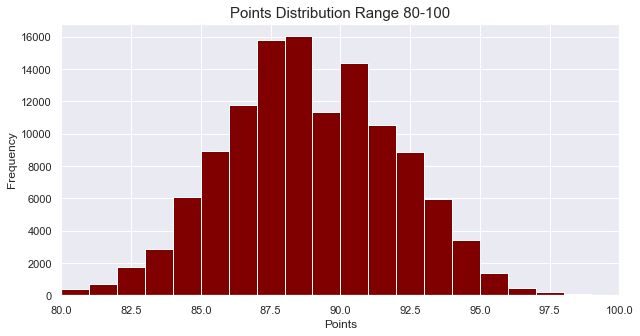

In [101]:
# Plot the distribution of points
plt.figure(figsize=(10,5))
bin_edges = np.arange (80, df1['points'].max()+1, 1)
plt.hist(data = df1, x = 'points', bins = bin_edges, color = 'maroon')
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');
plt.title('Points Distribution Range 80-100', fontsize = 15);

The plot shows a rough normal distribution between the rage 80-100.

In [102]:
# Extracting highest 5 wine producing countries
country_top = df1.country.value_counts()[:5]
country_top

US          54265
France      17776
Italy       16914
Spain        6573
Portugal     4875
Name: country, dtype: int64

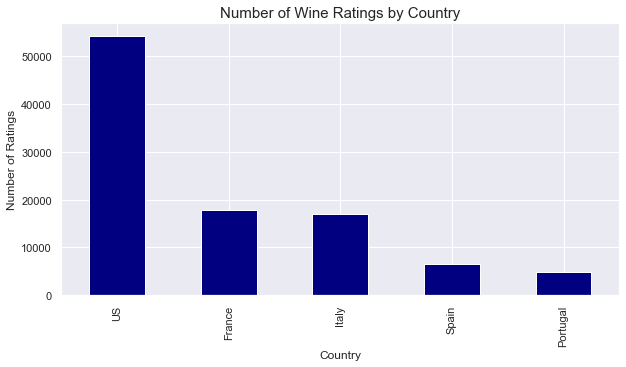

In [103]:
# Top 5 wine producing countries 
plt.figure(figsize=(10,5))
country_top.plot(kind='bar', color = 'navy')
plt.title('Number of Wine Ratings by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

It is apparent that the top 5 wine producing countries are: **USA**, **France**, **Italy**, **Spain**, **Portugal**

In [104]:
# Grouping countries by their average points
df_group = df1.groupby('country').agg('mean')

In [105]:
# A dataframe of countries with the 5 most points 
df_top_points = df_group.sort_values(by='points', ascending=False)[:5]
df_top_points

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598


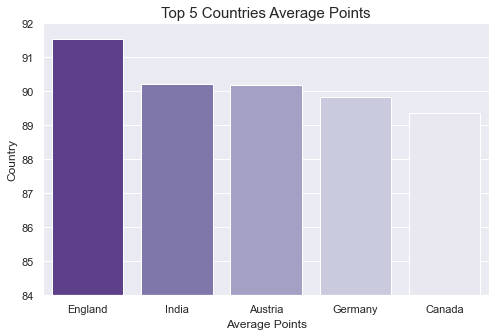

In [106]:
plt.figure(figsize=(8,5))
plt.ylim(84, 92)
sns.barplot(x=df_top_points.index, y=df_top_points['points'], palette='Purples_r')
plt.title('Top 5 Countries Average Points', fontsize = 15)
plt.xlabel('Average Points')
plt.ylabel('Country');

This analysis indicates that **England** owns the higest average points among all wine producers. However, the validity of this deduction should be assessed based on the number of datasets. Lower datasets with high rating could lead to this assumption. 

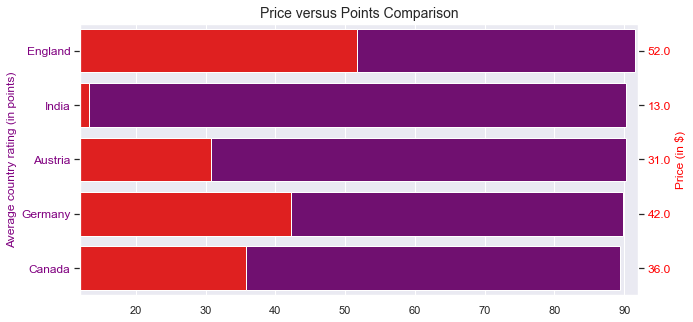

In [107]:
data=[df_top_points['points'], df_top_points['price']]
headers = ["points", "price"]
df=pd.concat(data, axis=1, keys=headers)

fig, ax1 = plt.subplots(figsize = (10,5))
 
sns.barplot(x=df['points'],y=df.index, color='purple')
ax1.tick_params(axis='y', labelcolor='purple', labelsize = 12)
ax1.set_ylabel('Average country rating (in points)', color='purple', fontsize=12) #mention unit for rating

ax2 = ax1.twinx()
plt.xlim(12, 92)


  
sns.barplot(x=df['price'], y=df.index, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize = 12) 
ax2.set_yticklabels(df_top_points['price'].round()) #relabel right axis with price values
ax1.set_xlabel("") #remove x-label because this axis applies to both categories
ax2.set_ylabel('Price (in $)', color='red', fontsize=12)#mention unit for price
ax2.set_title("Price versus Points Comparison", fontsize=14)
plt.show()

It can be seen that **India** has one of the highest average point with the lowst price. In comparison **England** has the highest average point with almost triple times more in price as the most expensive wine among all. **Astria** on the other hand is double as costy as **India**, yet almost similar in average points. We need to further investigae to underatnd if **India** gains that much attention purely as the result of its price or quality. **England** in terms of Price aversus Points is in a reasonable position, as it holds the highest rating and highest price.

In [108]:
df1.points.describe()

count    120915.000000
mean         88.421726
std           3.044954
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [109]:
high_scorers = df1[df1['points']>=96]
high_scorers

,country,description,points,price,province,region_1,title,variety,winery,year
345,Australia,"This wine contains some material over 100 years old, but shows no signs of fragility. Instead, it's concentrated through age and should hold in the bottle indefinitely. It's dark coffee-brown in color, with delectable aromas of rancio, dried fig, molasses and black tea, yet despite enormous concentration avoids excessive weight. And it's amazingly complex and fresh on the nearly endless finish.",100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen),Muscat,Chambers Rosewood Vineyards,NaN
346,Australia,"This deep brown wine smells like a damp, mossy cave. Then add complex rancio notes, plus maple syrup and molasses. It's full, round and harmonious, wonderfully rich yet without any sense of heaviness and long and bright on the finish.",98,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscadelle (Rutherglen),Muscadelle,Chambers Rosewood Vineyards,NaN
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed against intense mango and tangerine fruitiness in this deeply complex wine. It's unctuously sweet, but balanced by a piercing streak of acidity that penetrates through the midpalate. Spry and silken, it finishes on a long lingering whisper of honey and peach.",97,775.0,Rheingau,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbeerenauslese Riesling (Rheingau),Riesling,Robert Weil,2014
348,Australia,"Deep mahogany. Dried fig and black tea on the nose, then concentrated mocha and molasses flavors, enlivened by candied orange zest. Full, rich and sweet, but surprisingly drinkable, with terrific intensity and length.",97,100.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Grand Muscat (Rutherglen),Muscat,Chambers Rosewood Vineyards,NaN
349,Australia,"RunRig is always complex, and the 2012 doesn't disappoint in that regard, mixing bacony-meaty notes with hints of black olives and ripe plums. The tannins are supremely supple, but the acids are crisp, resulting in a long, mouthwatering finish. Drink now–2030.",97,225.0,South Australia,Barossa,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012
...,...,...,...,...,...,...,...,...,...,...
128267,US,"An extraordinary wine. It's the essence of Russian River Pinot, squared, a big, concentrated, dramatic wine that never loses sight of elegance. Offers a tapestry of cherry pie with the crust, red currant, cherry liqueur and smoky sandalwood flavors that finish with intricate Indian spices. Drink now–2013.",97,85.0,California,Russian River Valley,Semper 2007 Gold Ridge Pinot Noir (Russian River Valley),Pinot Noir,Semper,2007
128268,US,"A monumental Cabernet that succeeds on every level. It's deep, dark and ultrarich, showing massive blackberries, black currants, dark chocolate, violets, minerals and a touch of sweet, smoky oak. Beyond the flavors is the dramatic structure, with fabulously ripe, dense tannins and a bone-dry, long finish. Surely a tremendous wine capable of long-term aging. Try 2012–2018, at least.",97,50.0,California,Oak Knoll District,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon,Trefethen,2005
128269,US,"Massive, dramatic, beautiful, intense, but young and firm in tannins, with a cut of fresh acidity. Shows concentrated blackberries, black currants, violets, minerals and cedar, leading to a long, penetrating finish. Very great Cabernet, vibrant and potent, just tremendous in structure. Potentially a near-perfect wine with 4–6 years in the bottle.",97,100.0,California,Napa Valley,Hestan 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Hestan,2006
128270,US,"Monumentally detailed, this 100% Cabernet Sauvignon is impressive for its sheer volumetrics. Offers masses of blackberries, black currants, cherries and cassis. Huge, dramatic, yet impeccably balanced and dry. Feels firm and ultrarefined in tannic structure, with graceful acidity offering a perfect counterpoint 

In [110]:
high_scorers.country.value_counts()

US           351
France       185
Italy        129
Portugal      35
Austria       29
Germany       25
Spain         22
Australia     22
Hungary        4
Argentina      3
Name: country, dtype: int64

In [111]:
df1.country.value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

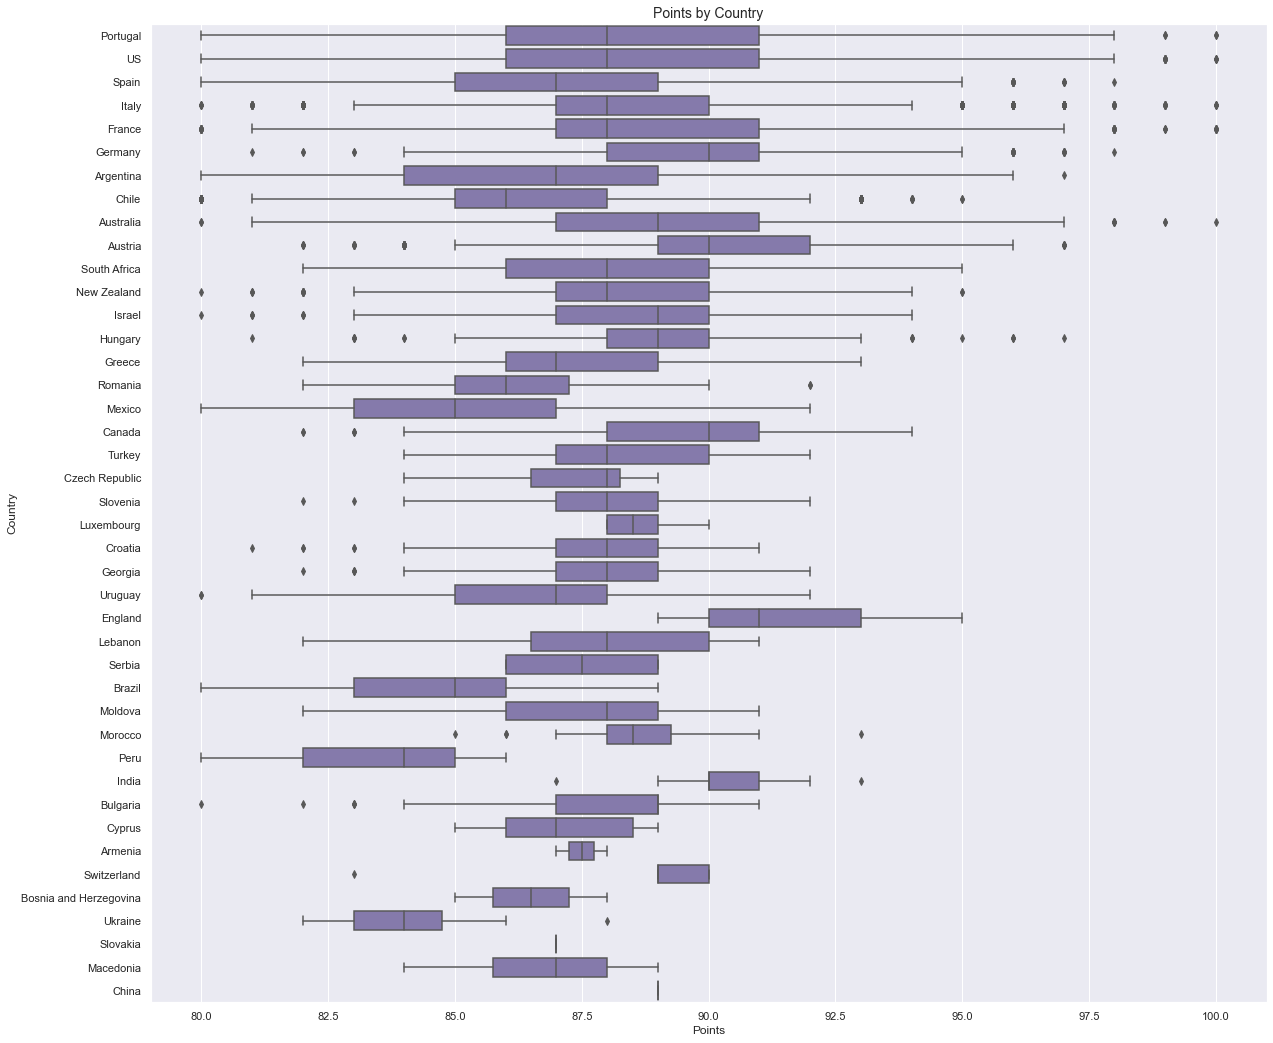

In [112]:
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df1, x = 'points', y = 'country', color = base_color)
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

In [113]:
wine_prov = df1.province.value_counts()[:10]

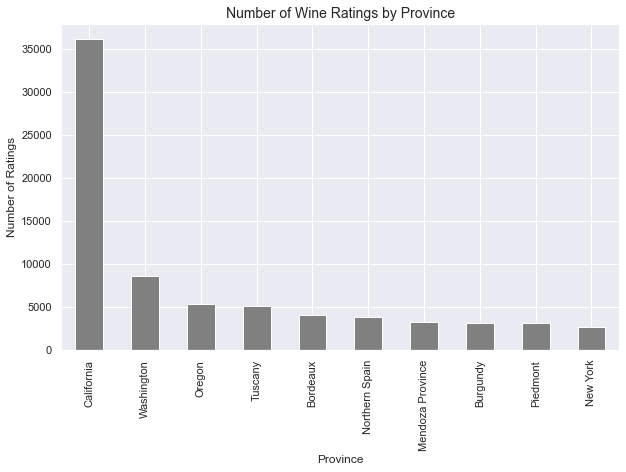

In [114]:
plt.figure(figsize=(10,6))
wine_prov.plot(kind='bar', color = 'gray')
plt.title('Number of Wine Ratings by Province', fontsize = 14)
plt.xlabel('Province')
plt.ylabel('Number of Ratings');

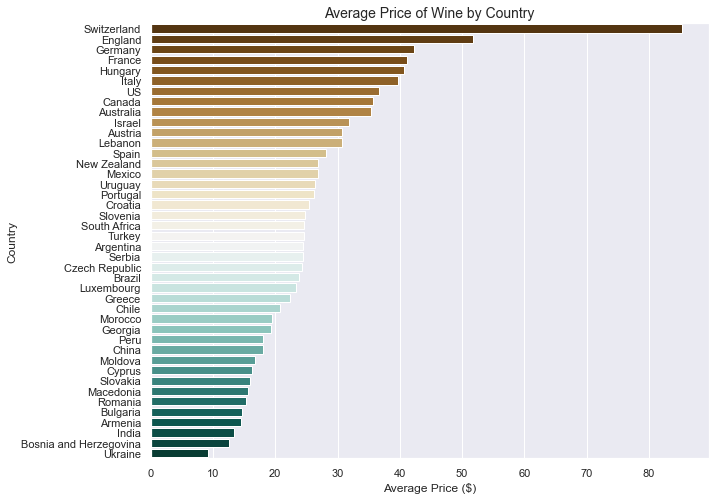

In [115]:
df4 = df1.groupby('country').agg('mean')
df5 = df4.sort_values(by='price', ascending=False)
y_val = df5.index.to_series()
x_val = df5['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x_val, y=y_val, palette='BrBG')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

### 2. Is Price Related to Quality of Wine?

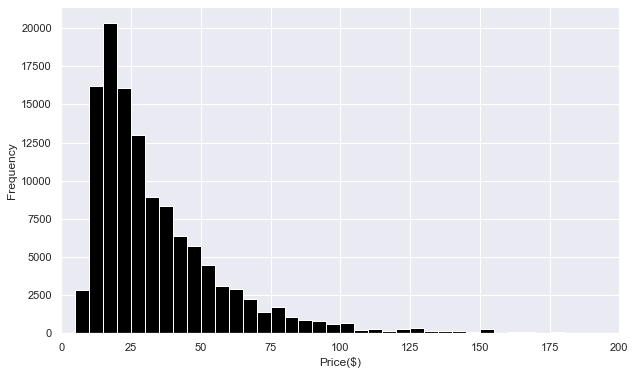

In [116]:
# plotting price distribution
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, df1['price'].max()+5, 5)
plt.hist(data = df1, x = 'price', bins = bin_edges, color = 'black')
plt.xlim(0,200) # cut the x-axis at 200
plt.xlabel('Price($)')
plt.ylabel('Frequency');

In [117]:
df1['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [118]:
np.log10(df1['price'].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

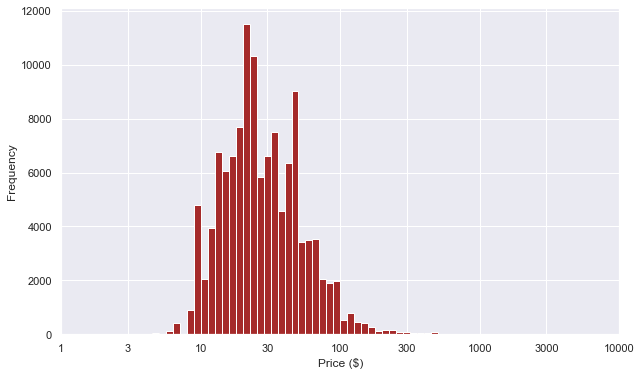

In [119]:
# plotting price distribution on a log scale
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = df1, x = 'price', bins=bin_edges, color = 'brown')
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

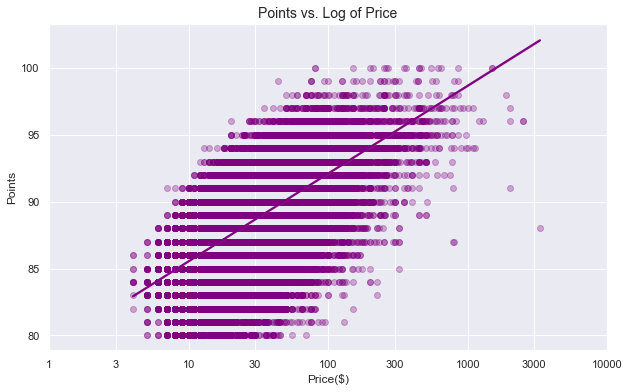

In [120]:
# plotting a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df1, color = 'purple', logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Log of Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

In [121]:
 # the lowest priced wine
df1.loc[df1['price'].idxmin()]

country                                                                                                                                                                                                                                   Spain
description    Berry and cherry aromas are surprisingly sturdy and clean. Freshness is maintained on the palate, which is honest enough to offer modest tannic bite. Lightly spiced plum and raspberry flavors change little on an easy finish.
points                                                                                                                                                                                                                                       85
price                                                                                                                                                                                                                                       4.0
province                                

In [122]:
# the highest priced wine
df1.loc[df1['price'].idxmax()]

country                                                                                                                                                                                                                                  France
description    This ripe wine shows plenty of blackberry fruits balanced well with some dry tannins. It is fresh, juicy with plenty of acidity, For a light vintage, it's perfumed, full of fresh flavors and will be ready to drink from 2017.
points                                                                                                                                                                                                                                       88
price                                                                                                                                                                                                                                    3300.0
province                                

In [148]:
df_top_points

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598


In [147]:
df

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598


In [150]:
pd.options.display.max_colwidth = 500
df1[df1['price']==df['price'].min()][:1]

,country,description,points,price,province,region_1,title,variety,winery,year


In [124]:
df1[df1['price']==df['price'].max()]

,country,description,points,price,province,region_1,title,variety,winery,year


### 3. Are certain varieties of Wine of Better Quality on Average?

Let's now compare the top 20 wine types and see how they score.

In [128]:
# top 20 wines by count
df1.variety.value_counts()[:20]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: variety, dtype: int64

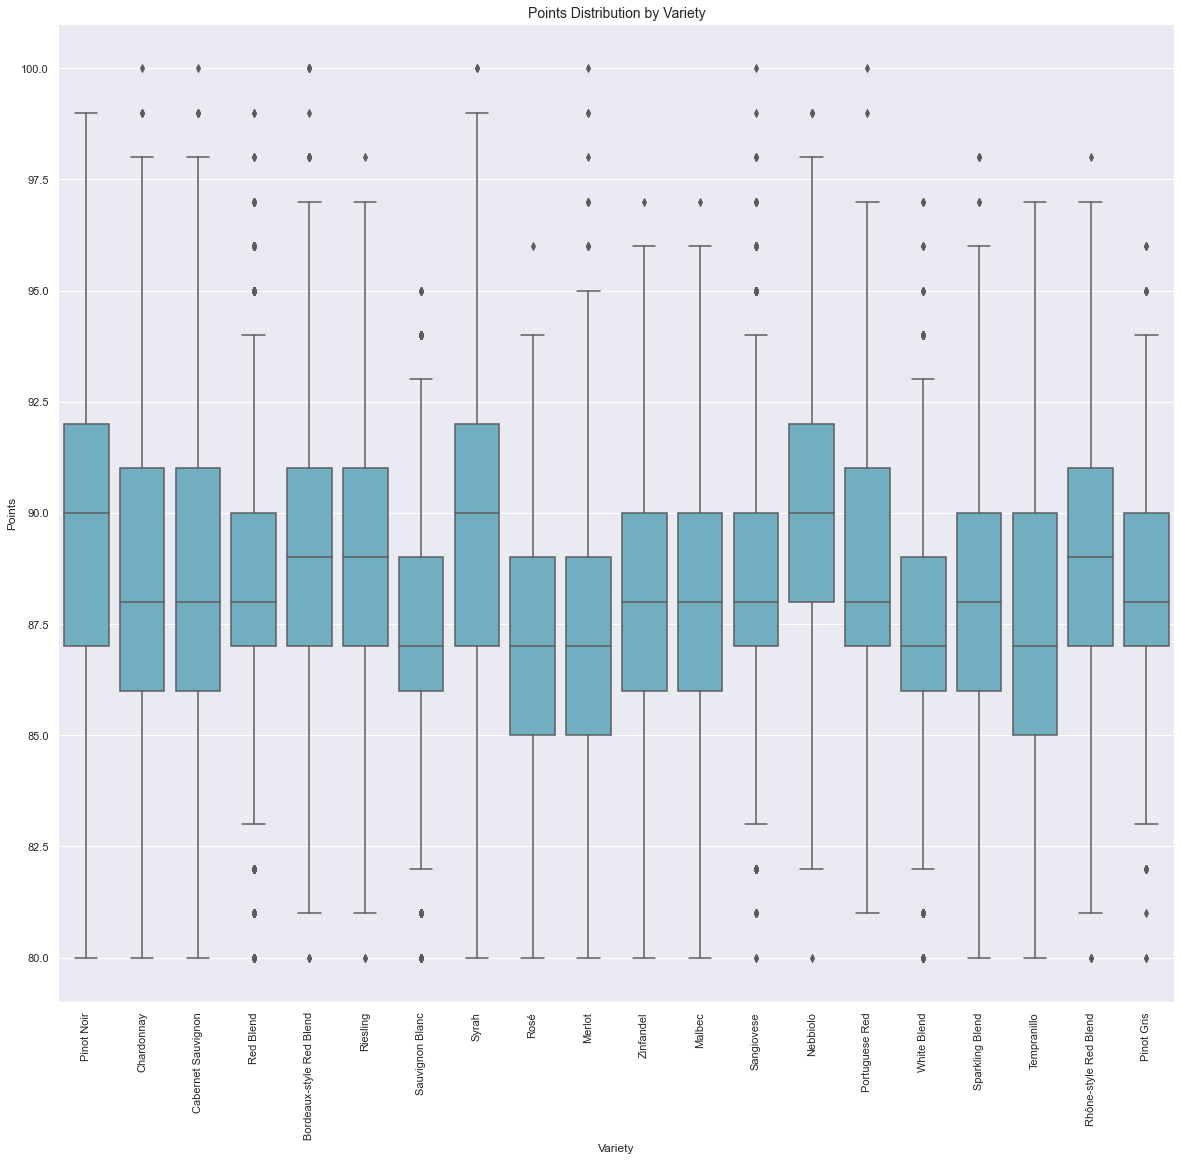

In [141]:
# boxplot of the top 20 most frequent wines in dataset by points scored
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[9]
sns.boxplot(data = df1, x = 'variety', y = 'points', color = base_color, order = df1.variety.value_counts().iloc[:20].index)
plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

When plotting the top 20 most popular wines in the dataset we can see that pinor noir tends to perform the best with the highest average score.